In [30]:
import pandas as pd
import numpy as np
import seaborn as sns


In [16]:
# 文件修改了 把两个文件合并成一个，由于只有label文件，所以随机生产了 2列 （生肖，星座）
zodiac_label = pd.read_csv("../data/7月第二课/zodiac_label_modify.csv",encoding="gbk")
zodiac_label.head()

,order_id,overdue_days,label,chinese_zodiac,zodiac
0,1,0,0,狗,巨蟹座
1,2,1,0,蛇,摩羯座
2,3,0,0,马,处女座
3,4,0,0,猴,狮子座
4,5,0,0,兔,处女座


In [17]:
zodiac_label.describe()

,order_id,overdue_days,label
count,43432.000000,43432.000000,43432.000000
mean,21716.500000,3.650350,0.145952
std,12537.882782,9.698836,0.386678
min,1.000000,0.000000,0.000000
25%,10858.750000,0.000000,0.000000
50%,21716.500000,0.000000,0.000000
75%,32574.250000,1.000000,0.000000
max,43432.000000,44.000000,2.000000


In [22]:
# 发现label有2的数据，不合理,剔除label=2的数据
zodiac_label['label'].value_counts().sort_index()

0    37633
1     5259
2      540
Name: label, dtype: int64

In [24]:
ft_label = zodiac_label[zodiac_label['label'] != 2]
ft_label['label'].value_counts().sort_index()

0    37633
1     5259
Name: label, dtype: int64

badrate = bad/toal

In [25]:
ft_label['chinese_zodiac'].value_counts().sort_index()

兔    3596
牛    3513
狗    3537
猪    3544
猴    3605
羊    3591
虎    3573
蛇    3546
马    3575
鸡    3526
鼠    3674
龙    3612
Name: chinese_zodiac, dtype: int64

In [26]:
ft_label['zodiac'].value_counts().sort_index()

双子座    3563
双鱼座    3624
处女座    3456
天秤座    3612
天蝎座    3558
射手座    3583
巨蟹座    3592
摩羯座    3539
水瓶座    3621
狮子座    3651
白羊座    3611
金牛座    3482
Name: zodiac, dtype: int64

Default Rate: 0.12261027697472722


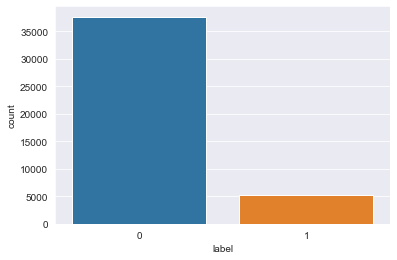

In [31]:
# 总体逾期率
sns.countplot(x="label", data=ft_label)
print("Default Rate: {}".format(ft_label["label"].sum() / len(ft_label)))

In [70]:

#星座 计算每个星座的逾期率
zodiac_list = set(ft_label.zodiac)
zodiac_badrate = {}
for x in zodiac_list:
    a = ft_label[ft_label.zodiac == x]
    bad = a[a.label == 1]['label'].count()
    good = a[a.label == 0]['label'].count()
    zodiac_badrate[x] = bad/(bad+good)

In [71]:
zodiac_badrate

{'射手座': 0.12112754674853475,
 '狮子座': 0.12188441522870447,
 '处女座': 0.12268518518518519,
 '巨蟹座': 0.11497772828507795,
 '双鱼座': 0.11892935982339956,
 '水瓶座': 0.1231703949185308,
 '白羊座': 0.1254500138465799,
 '双子座': 0.123210777434746,
 '摩羯座': 0.1299802204012433,
 '金牛座': 0.1234922458357266,
 '天蝎座': 0.12703766160764474,
 '天秤座': 0.11960132890365449}

In [72]:
f = zip(zodiac_badrate.keys(),zodiac_badrate.values())
f = sorted(f,key = lambda x : x[1],reverse = True )
zodiac_badrate = pd.DataFrame(f)
zodiac_badrate.columns = pd.Series(['星座','badrate'])
zodiac_badrate

,星座,badrate
0,摩羯座,0.129980
1,天蝎座,0.127038
2,白羊座,0.125450
3,金牛座,0.123492
4,双子座,0.123211
5,水瓶座,0.123170
6,处女座,0.122685
7,狮子座,0.121884
8,射手座,0.121128
9,天秤座,0.119601


<AxesSubplot:xlabel='星座', ylabel='badrate'>

/Users/xuhuan/opt/anaconda3/envs/Ai-python/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25705 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/xuhuan/opt/anaconda3/envs/Ai-python/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 32687 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/xuhuan/opt/anaconda3/envs/Ai-python/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24231 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/xuhuan/opt/anaconda3/envs/Ai-python/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22825 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/xuhuan/opt/anaconda3/envs/Ai-python/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 34638 missing from current font.
  font.set_text(s, 0.0

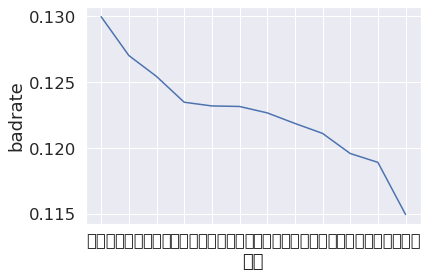

In [73]:

sns.set(font='SimHei',font_scale=1.5)  # 解决Seaborn中文显示问题并调整字体大小
sns.lineplot(x="星座", y="badrate", data=zodiac_badrate)


In [75]:
from pyecharts.charts import Line

x = zodiac_badrate['星座']
y = zodiac_badrate['badrate']
# line = Line("折线图","一年的降水量与蒸发量")
# line.add("降水量", x, y, is_label_show=True)
# line.render('pyecharts-line.html') # 生成一个名为pyecharts-line.html的网页文件，打开网页就是下图

line2=(
    Line()
    .add_xaxis(x)
    .add_yaxis('badrate',y)
)
# line2.render('pyecharts-line.html')
# line2.load_javascript()
# line2.render_notebook()